In [2]:
import pandas as pd
import numpy as np
data_day=pd.read_csv("Bike-Sharing-Dataset/day.csv",usecols=['season','holiday','weekday','workingday','weathersit','cnt'])
data_hour=pd.read_csv("Bike-Sharing-Dataset/hour.csv")
data_day.sample(frac=1).head()
training_data=data_day.iloc[:int(0.7*len(data_day))].reset_index(drop=True)
testing_data=data_day.iloc[int(0.7*len(data_day)):].reset_index(drop=True)

In [2]:
import sklearn.ensemble as ensemble
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')
##随机回归森林参数对模型影响
RMSE=[]
for i in range(1,500):
    model1=ensemble.RandomForestRegressor(n_estimators=i)
    model1.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model1.predict(testing_data.iloc[:,:-1])
    label=np.asarray(testing_data.iloc[:,-1:])
    label=label.reshape([len(testing_data)])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
pl.plot(RMSE,label="RMSE")
pl.xlabel("n_estimators")
pl.show()

<Figure size 640x480 with 1 Axes>

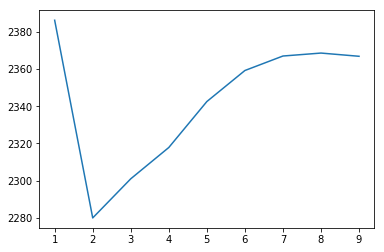

In [3]:
#max_depth的影响
RMSE=[]
label=np.asarray(testing_data.iloc[:,-1:])
label=label.reshape([len(testing_data)])
for i in range(1,10):
    model2=ensemble.RandomForestRegressor(max_depth=i,n_estimators=300)#基分类器是回归树
    model2.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model2.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(range(1,10))
pl.plot(x,RMSE,label="RMSE")
pl.show()

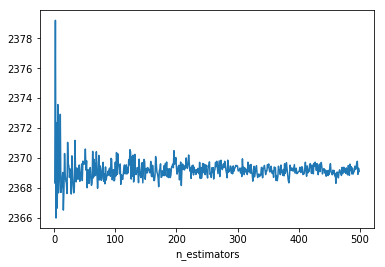

In [4]:
##极致随机回归森林参数对模型性能影响
RMSE=[]
for i in range(1,500):
    model3=ensemble.ExtraTreesRegressor(n_estimators=i)#基分类器是回归树
    model3.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model3.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(range(1,500))
pl.plot(x,RMSE,label="RMSE")
pl.xlabel("n_estimators")
pl.show()

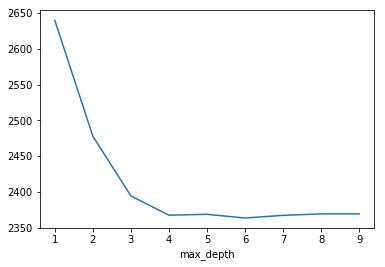

In [5]:
RMSE=[]
for i in range(1,10):
    model4=ensemble.ExtraTreesRegressor(max_depth=i,n_estimators=300)
    model4.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model4.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(range(1,10))
pl.plot(x,RMSE,label="RMSE")
pl.xlabel("max_depth")
pl.show()

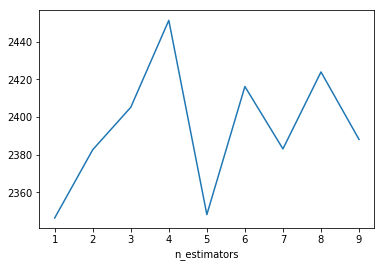

In [ ]:
##AdaBoosting回归树的
from sklearn.tree import DecisionTreeRegressor 
RMSE=[]
for i in range(1,10):
    model5=ensemble.AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=i))#默认基分类器是回归树，可以自己定义
    model5.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model5.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(range(1,10))
pl.plot(x,RMSE,label="RMSE")
pl.xlabel("n_estimators")
pl.show()

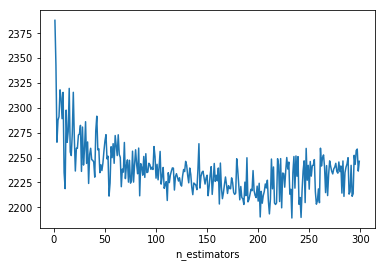

In [ ]:
RMSE=[]
for i in range(1,300,1):
    model6=ensemble.AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),n_estimators=i,learning_rate=0.0125)#默认基分类器是回归树，可以自己定义
    model6.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model6.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(range(1,300,1))
pl.plot(x,RMSE,label="RMSE")
pl.xlabel("n_estimators")
pl.show()

In [ ]:
##GBDT
RMSE=[]
for i in range(1,600):
    model7=ensemble.GradientBoostingRegressor(n_estimators=i,learning_rate=0.01,loss="quantile")
    model7.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model7.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(range(1,600,1))
pl.plot(x,RMSE,label="RMSE")
pl.xlabel("n_estimators")
pl.show()

In [ ]:
##GBDT
RMSE=[]
for i in range(1,10):
    model8=ensemble.GradientBoostingRegressor(n_estimators=500,max_depth=i,learning_rate=0.01,loss='quantile')
    model8.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model8.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(range(1,10,1))
pl.plot(x,RMSE,label="RMSE")
pl.xlabel("max_depth")
pl.show()

In [ ]:
##GBDT
RMSE=[]
for i in np.arange(0.001,0.01,0.001):
    model9=ensemble.GradientBoostingRegressor(n_estimators=500,max_depth=2,learning_rate=i,loss='quantile')
    model9.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    predict=model9.predict(testing_data.iloc[:,:-1])
    RMSE.append(np.sqrt(np.sum((predict-label)**2)/(len(testing_data)-1)))
x=list(np.arange(0.001,0.01,0.001))
pl.plot(x,RMSE,label="RMSE")
pl.xlabel("learning_rate")
pl.show()

In [ ]:
##XGBOOST使用
import xgboost
model10=xgboost.XGBRegressor()
model10.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
predict=model10.predict(testing_data.iloc[:,:-1])
predict